<a href="https://colab.research.google.com/github/lin3372/600_graph_neural_net/blob/main/501_networkx%EF%BC%88Graph%EF%BC%89Basic_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx

%matplotlib inline
from matplotlib import pyplot as plt

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

oo = float('inf')

## Graph Drawing FNs

In [ ]:
def draw_graph(G, node_names={}, filename=None, node_size=50, layout = None, edge_color='gray'):
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color=edge_color)
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")

## Undirected Graph (無向圖), Directed Graph(有向圖), Weighted Directed Graph(加權圖)

[1, 2, 3] [(2, 3)] 3 1
[(2, 3), (3, 2)]
{'weight': 7.5}
[(0, 1, {'weight': 3.0}), (1, 2, {'weight': 7.5}), (2, 3, {'color': 5})]
[(0, {}), (1, {'size': 100}), (2, {}), (3, {})]


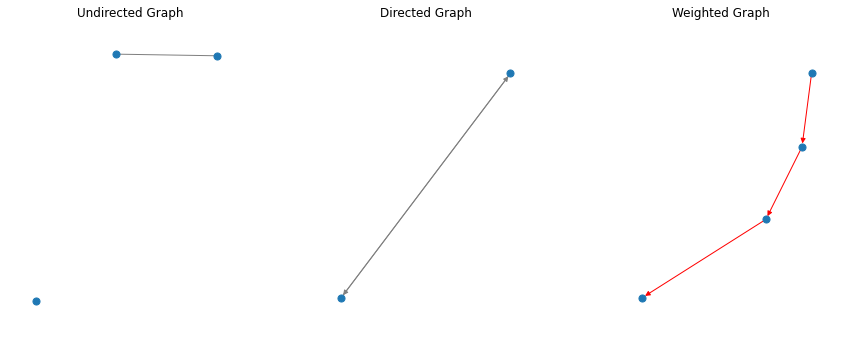

In [ ]:
plt.figure(figsize=(15,6))

# 創建無向圖
G = nx.Graph()
G.add_node(1) # 添加節點１
G.add_edge(2,3) #　添加節點２，３並鏈接２３節點
print(G.nodes, G.edges, G.number_of_nodes(), G.number_of_edges())
plt.subplot(1,3,1)
plt.title(f"Undirected Graph")
draw_graph(G)

# 創建有向圖
G = nx.DiGraph() 
G.add_edge(2, 3)
G.add_edge(3, 2)
G.to_undirected()  # 轉換成無向圖
print(G.edges)
plt.subplot(1,3,2)
plt.title(f"Directed Graph")
draw_graph(G)

# 加權圖
G = nx.DiGraph()
G.add_weighted_edges_from([(0,1,3.0), (1,2,7.5)]) # 給０１邊加權３，　１２邊加權７．５
print(G.get_edge_data(1,2))  # 獲得１２邊的屬性

G.add_weighted_edges_from([(2,3,5)], weight='color')
print(G.edges.data())

G.nodes[1]['size'] = 100
print(G.nodes.data())
plt.subplot(1,3,3)
plt.title(f"Weighted Graph")
draw_graph(G, edge_color='red')

#d = dict(G.nodes.values)

[(1, 3, {'weight': 1}), (2, 3, {'weight': 5}), (2, 5, {'weight': 3}), (3, 6, {'weight': 4}), (4, 6, {'weight': 2})]


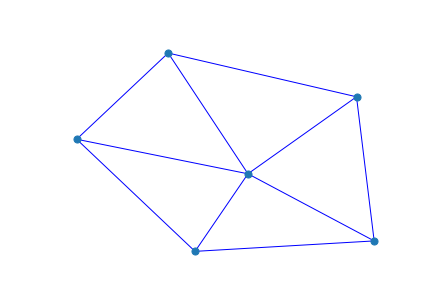

In [ ]:
g_data = [(1, 2, 6), (1, 3, 1), (1, 4, 5),
          (2, 3, 5),  (2, 5, 3),
          (3, 4, 5), (3, 5, 6), (3, 6, 4), (4, 6, 2),
          (5, 6, 6)]

# 最小生成樹
g = nx.Graph()
g.add_weighted_edges_from(g_data)
tree = nx.minimum_spanning_tree(g, algorithm='prim')
print(tree.edges(data=True))

draw_graph(g, edge_color='blue')

[0, 1, 2, 3, 4]
{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4], 5: [1, 2, 5], 6: [1, 3, 6]}, 2: {2: [2], 1: [2, 1], 3: [2, 3], 5: [2, 5], 4: [2, 1, 4], 6: [2, 3, 6]}, 3: {3: [3], 1: [3, 1], 2: [3, 2], 4: [3, 4], 5: [3, 5], 6: [3, 6]}, 4: {4: [4], 1: [4, 1], 3: [4, 3], 6: [4, 6], 2: [4, 1, 2], 5: [4, 3, 5]}, 5: {5: [5], 2: [5, 2], 3: [5, 3], 6: [5, 6], 1: [5, 2, 1], 4: [5, 3, 4]}, 6: {6: [6], 3: [6, 3], 4: [6, 4], 5: [6, 5], 1: [6, 3, 1], 2: [6, 3, 2]}}
{1: {1: 5.269088285128797, 2: 4.61281969015233, 3: 6.378804644631191, 4: 4.612819690152331, 5: 3.8717917686287553, 6: 3.8717917686287553}, 2: {1: 4.61281969015233, 2: 5.269088285128798, 3: 6.378804644631192, 4: 3.871791768628753, 5: 4.612819690152334, 6: 3.871791768628756}, 3: {1: 6.378804644631191, 2: 6.378804644631192, 3: 9.480701913428605, 4: 6.378804644631193, 5: 6.378804644631199, 6: 6.378804644631199}, 4: {1: 4.612819690152331, 2: 3.871791768628753, 3: 6.378804644631193, 4: 5.2690882851288, 5: 3.871791768628757, 6: 4.612819690152335}

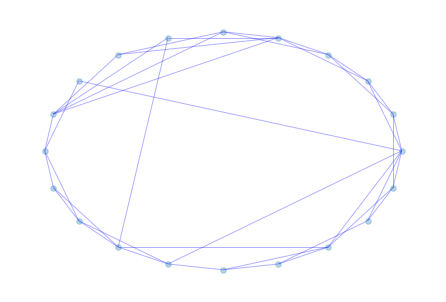

In [ ]:
# 最短路徑
G = nx.path_graph(5)  # 0-1-2-3-4鏈
print(nx.dijkstra_path(G, 0, 4))

# 所有節點之間的最短路徑
G = nx.Graph()
G.add_weighted_edges_from(g_data)
gen = nx.all_pairs_shortest_path(G)
print(dict(gen))

# 各點之間可達性
G = nx.Graph()
G.add_weighted_edges_from(g_data)
print(nx.communicability(G))

# 獲得圖中非連通點的列表
G = nx.Graph()
G.add_edge(1,2)
G.add_node(3)
print(list(nx.isolates(G)))

# 遍历
G = nx.Graph()
G.add_weighted_edges_from(g_data)
d_gen = nx.dfs_edges(G,1)  #  按邊深度搜索, 1為起點
b_gen = nx.bfs_edges(G,1)
print(list(d_gen), list(b_gen))
print(nx.dfs_tree(G,1).nodes())  # 按點深搜


from networkx.algorithms.flow import shortest_augmenting_path
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edge('x','a', capacity=3.0)
G.add_edge('x','b', capacity=1.0)
G.add_edge('a','c', capacity=3.0)
G.add_edge('b','c', capacity=5.0)
G.add_edge('b','d', capacity=4.0)
G.add_edge('d','e', capacity=2.0)
G.add_edge('c','y', capacity=2.0)
G.add_edge('e','y', capacity=3.0)

# 將參數畫到圖上
pos = nx.spring_layout(G)
capacity = nx.get_edge_attributes(G, 'capacity')
# nx.draw_networkx_nodes(G, pos)
# nx.draw_networkx_edges(G, pos)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,capacity)

# 最大流
flow_value, flow_dict = nx.maximum_flow(G,'x', 'y', flow_func=shortest_augmenting_path)
print(flow_value, flow_dict)
# plt.show()


# 最小成本流
G = nx.DiGraph()
G.add_node('a', demand = -5)
G.add_node('d', demand = 5)
G.add_edge('a', 'b', weight = 3, capacity = 4)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 9)
G.add_edge('c', 'd', weight = 2, capacity = 5)
flow_cost, flow_dict = nx.capacity_scaling(G)
print(flow_cost, flow_dict)

# 歐拉回路  一個無向圖G,一條路徑經過圖G的每一條邊,且僅經過一次,這條路徑稱為歐拉路徑．如果起點和終點同一點，則為歐拉回路
# 無向圖：每個頂點的度數都是偶數則存在歐拉回路
# 有向圖：每個頂點的入度都等於出度則存在歐拉回路
DG = nx.DiGraph({0: [3], 1: [2], 2: [3], 3: [0, 1]})
G = nx.Graph({0: [1,2], 1: [0,2], 2: [0,1,3,4], 3: [2,4], 4:[2,3]})
print(nx.is_eulerian(DG))
print(nx.is_eulerian(G))
print(list(nx.eulerian_circuit(DG)))
print(list(nx.eulerian_circuit(G)))

# 最小點割集
node_cut = nx.minimum_node_cut(G, flow_func=shortest_augmenting_path)
print(node_cut)

# 對於帶權無向圖邊切割，得到最小切割權之和，以及兩個分離區域
G = nx.Graph()
G.add_edge('x','a', weight=3)
G.add_edge('x','b', weight=1)
G.add_edge('a','c', weight=3)
G.add_edge('b','c', weight=5)
G.add_edge('b','d', weight=4)
G.add_edge('d','e', weight=2)
G.add_edge('c','y', weight=2)
G.add_edge('e','y', weight=3)

cut_value, partition = nx.stoer_wagner(G)
print(cut_value, partition)

# 最大權重匹配　匈牙利、KM算法
G = nx.Graph()
G.add_weighted_edges_from([('A', 'a', 3), ('A', 'c', 4), ('B', 'a', 2), ('B', 'b', 1), ('B', 'c', 3), ('C', 'c', 5)])
print(nx.max_weight_matching(G))

# 拓撲排序
G = nx.DiGraph()
G.add_edge('x','a', weight=3)
G.add_edge('a','c', weight=3)
G.add_edge('b','c', weight=5)
G.add_edge('b','d', weight=4)
G.add_edge('d','e', weight=2)
G.add_edge('c','y', weight=2)
G.add_edge('e','y', weight=3)
print(list(nx.topological_sort(G)))

# 最小成本最大流
G = nx.DiGraph()
G.add_edge('a', 'b', weight = 3, capacity = 4)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 9)
G.add_edge('c', 'd', weight = 2, capacity = 5)
print(nx.max_flow_min_cost(G, 'a', 'd'))


#複雜網絡生成
# ER隨機圖   # 隨機生成20個節點，節點間的連接概率都是0.2
# ER = nx.random_graphs.erdos_renyi_graph(20, 0.2)
# pos = nx.shell_layout(ER)
# nx.draw(ER, pos, with_labels=False,edge_color='b', alpha=0.3, node_size=30)
# plt.show()

# WS小世界網絡  生成一個含有n個節點、每個節點有k個鄰居、以概率p隨機化重連邊的WS小世界網絡。
WS = nx.random_graphs.watts_strogatz_graph(20, 4, 0.3)
pos = nx.circular_layout(WS)
nx.draw(WS, pos, with_labels=False, node_size=30, edge_color='b', alpha=0.3)
plt.show()


# BA無標度網絡 生成一個含有n個節點、每次加入m條邊的BA無標度網絡
# BA = nx.random_graphs.barabasi_albert_graph(10,2)
# pos = nx.spring_layout(BA)
# nx.draw(BA, pos, with_labels=False, node_size=30, edge_color='b', alpha=0.3)
# plt.show()

# 擴展ＢＡ無標度網絡  節點數，添加新邊數，兩點間添加邊的概率，邊重連的概率
# ExBA = nx.random_graphs.extended_barabasi_albert_graph(200, 4, 0.4, 0.2)
# pos = nx.spring_layout(ExBA)
# nx.draw(ExBA, pos, with_labels=False, node_size=30, edge_color='b', alpha=0.3)
# plt.show()